In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regionmask
import cartopy.crs as ccrs
from io import StringIO
#import geopy.distance

In [4]:
# !wget https://coastwatch.pfeg.noaa.gov/erddap/griddap/erdMH1chla1day.json?chlorophyll[(2020-02-16T12:00:00Z):1:(2020-02-16T12:00:00Z)][(89.97916):1:(-89.97918)][(-179.9792):1:(179.9792)]

In [5]:
# with open('erdMH1chla1day.htmlTable?chlorophyll') as chlorophyll_data:
#     print(chlorophyll_data.head())
    
# chlorophyll = pd.read_json('erdMH1chla1day.json')
# chlorophyll.head()

In [6]:
from zipfile import ZipFile
!wget https://s3.us-east-2.amazonaws.com/earthstatdata/HarvestedAreaYield175Crops_Indvidual_Geotiff/wheat_HarvAreaYield_Geotiff.zip
!wget https://s3.us-east-2.amazonaws.com/earthstatdata/HarvestedAreaYield175Crops_Indvidual_Geotiff/rice_HarvAreaYield_Geotiff.zip
!wget https://s3.us-east-2.amazonaws.com/earthstatdata/HarvestedAreaYield175Crops_Indvidual_Geotiff/soybean_HarvAreaYield_Geotiff.zip

--2020-03-23 00:31:03--  https://s3.us-east-2.amazonaws.com/earthstatdata/HarvestedAreaYield175Crops_Indvidual_Geotiff/wheat_HarvAreaYield_Geotiff.zip
Resolving s3.us-east-2.amazonaws.com (s3.us-east-2.amazonaws.com)... 52.219.96.130
Connecting to s3.us-east-2.amazonaws.com (s3.us-east-2.amazonaws.com)|52.219.96.130|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10437960 (10.0M) [application/zip]
Saving to: ‘wheat_HarvAreaYield_Geotiff.zip.11’

wheat_HarvAreaYield 100%[===================>]   9.95M  31.1MB/s    in 0.3s    

2020-03-23 00:31:03 (31.1 MB/s) - ‘wheat_HarvAreaYield_Geotiff.zip.11’ saved [10437960/10437960]

--2020-03-23 00:31:04--  https://s3.us-east-2.amazonaws.com/earthstatdata/HarvestedAreaYield175Crops_Indvidual_Geotiff/rice_HarvAreaYield_Geotiff.zip
Resolving s3.us-east-2.amazonaws.com (s3.us-east-2.amazonaws.com)... 52.219.104.122
Connecting to s3.us-east-2.amazonaws.com (s3.us-east-2.amazonaws.com)|52.219.104.122|:443... connected.
HTTP re

In [7]:
with ZipFile('wheat_HarvAreaYield_Geotiff.zip') as crops:
    #crops.printdir()
    crops.extractall()
with ZipFile('rice_HarvAreaYield_Geotiff.zip') as crops:
    #crops.printdir()
    crops.extractall()
with ZipFile('soybean_HarvAreaYield_Geotiff.zip') as crops:
    #crops.printdir()
    crops.extractall()

In [8]:
import xarray as xr
wheat = xr.open_rasterio('wheat_HarvAreaYield_Geotiff/wheat_YieldPerHectare.tif')
rice = xr.open_rasterio('rice_HarvAreaYield_Geotiff/rice_YieldPerHectare.tif')
soybean = xr.open_rasterio('soybean_HarvAreaYield_Geotiff/soybean_YieldPerHectare.tif')

In [9]:
# Set environment variables for cloud-optimized-geotiffs efficiency
env = rasterio.Env(GDAL_DISABLE_READDIR_ON_OPEN='EMPTY_DIR',
                   CPL_VSIL_CURL_USE_HEAD=False,
                   CPL_VSIL_CURL_ALLOWED_EXTENSIONS='TIF')

NameError: name 'rasterio' is not defined

In [10]:
wheat.head()

<xarray.DataArray (band: 1, y: 5, x: 5)>
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 89.96 89.87 89.79 89.71 89.62
  * x        (x) float64 -180.0 -179.9 -179.8 -179.7 -179.6
Attributes:
    transform:         (0.0833333333333286, 0.0, -180.0, 0.0, -0.083333333333...
    crs:               +init=epsg:4326
    res:               (0.0833333333333286, 0.0833333333333286)
    is_tiled:          1
    nodatavals:        (nan,)
    scales:            (1.0,)
    offsets:           (0.0,)
    AREA_OR_POINT:     Area
    TIFFTAG_SOFTWARE:  MATLAB 8.0, Mapping Toolbox 3.6

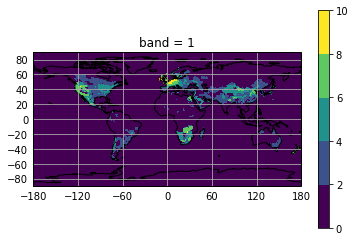

In [11]:

wheat.plot()
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(['Tons per Hectare'])
ax = plt.axes(projection = ccrs.PlateCarree())
#ax.set_global()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
ax.coastlines()
# ax.cmap('YlGn')
ax.set_xlabel('Latitude')
wheat.isel(band = 0).plot.contourf(ax=ax, transform = ccrs.PlateCarree())

In [12]:
wheat.attrs

{'transform': (0.0833333333333286,
  0.0,
  -180.0,
  0.0,
  -0.0833333333333286,
  89.99999999998977),
 'crs': '+init=epsg:4326',
 'res': (0.0833333333333286, 0.0833333333333286),
 'is_tiled': 1,
 'nodatavals': (nan,),
 'scales': (1.0,),
 'offsets': (0.0,),
 'AREA_OR_POINT': 'Area',
 'TIFFTAG_SOFTWARE': 'MATLAB 8.0, Mapping Toolbox 3.6'}

# *** this is my main problem right now
# vvv
I don't know why it only has one entry for the entire crop and it seems to have all of the possible latitude/longitude combos in one entry but I would like to separate it. In addition, is there a way to condense/take a average of everything from 89.00 to 89.99 for a simplified dataframe?


In [13]:
wheatdf = wheat.to_dataframe(name = 'wheat')
#wheatdf.loc[-9.19: -75.02:2]
#wheatdf.drop(['band'], axis =1)
wheatdf

wheat
band y          x                 
1     89.958333 -179.958333    0.0
                -179.875000    0.0
                -179.791667    0.0
                -179.708333    0.0
                -179.625000    0.0
...                            ...
     -89.958333  179.625000    0.0
                 179.708333    0.0
                 179.791667    0.0
                 179.875000    0.0
                 179.958333    0.0

[9331200 rows x 1 columns]

In [14]:
dfpart2 = wheat['wheat']

KeyError: 'wheat'

In [ ]:
wheat.coords

In [ ]:
wheat.values

In [ ]:
wheat.coords

In [ ]:
soybean.plot()

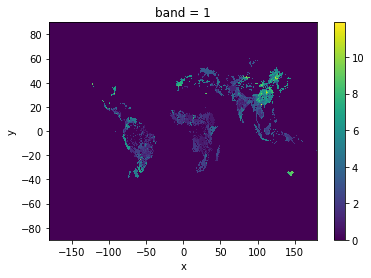

In [13]:
rice.plot()

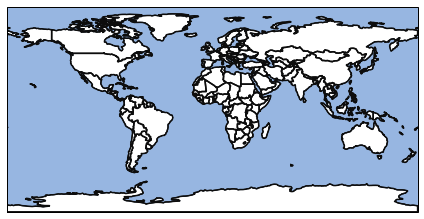

In [14]:
mask = regionmask.defined_regions.natural_earth.countries_110.plot(add_label= False)
plt.tight_layout()

In [15]:
#wheat.coords['mask'] =  (('latitude', 'longitude'), mask)


In [ ]:
wheatdf = wheat[band = 0].